<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Методы машинного обучения</center></h1>
<h2><center>Кластеризация</center></h2>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

/Users/andrey.shestakov/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Применение K-means

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.

In [3]:
df_sns = pd.read_csv('data/snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

In [6]:
df_sns.columns[4:].values

array(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching',
       'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair',
       'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs'], dtype=object)

#### Задание

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
X = df_sns.iloc[:, 4:].values

In [11]:
# нормализуем данные
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
#применим к-средних с к=9
kmeans = KMeans(n_clusters=9, random_state=123)
kmeans.fit(X_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [31]:
labels = kmeans.labels_ # метки кластеров для объектов из Х

In [32]:
centroids = kmeans.cluster_centers_ # координаты центройдов
criterion = kmeans.inertia_ # значения критерия для разбиения

In [33]:
criterion

861745.6454158238

In [34]:
centroids.shape

(9, 36)

In [35]:
df_sns.loc[:, 'cluster_label'] = labels

In [36]:
df_sns.cluster_label.value_counts()

4    20024
0     5036
1     1337
6      846
8      841
2      752
3      697
7      466
5        1
Name: cluster_label, dtype: int64

In [46]:
for k, group in df_sns.groupby('cluster_label'):
    print('='*10)
    print('Cluster {}'.format(k))
    
    top_words = group.iloc[:, 4:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    print(top_words)

Cluster 0
music         1.066521
dance         1.051033
shopping      0.890191
cute          0.828435
basketball    0.722597
hair          0.691223
mall          0.652502
football      0.617752
god           0.573272
church        0.496426
dtype: float64
Cluster 1
drunk       1.409873
music       0.707554
hair        0.629020
god         0.522064
dance       0.439043
cute        0.384443
sex         0.380703
shopping    0.326103
mall        0.287210
die         0.275991
dtype: float64
Cluster 2
band        4.105053
marching    1.418883
music       1.215426
god         0.505319
dance       0.464096
hair        0.371011
rock        0.344415
shopping    0.289894
football    0.275266
cute        0.275266
dtype: float64
Cluster 3
soccer        4.901004
music         0.773314
shopping      0.499283
god           0.469154
hair          0.440459
basketball    0.428981
dance         0.398852
football      0.397418
cute          0.337159
church        0.321377
dtype: float64
Cluster 4
music     

# Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

* Подготовте данные к кластеризации и сделайте иерарническую кластеризацию этого набора данных.
* Изобразите дендрограмму
* Выверите число кластеров и интерпретируйте их

Почему перед применением кластеризации признки необходимо нормализовать?

In [47]:
df = pd.read_csv('data/food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [51]:
X = df.iloc[:, 1:].values

In [53]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

In [55]:
X_.shape

(27, 5)

In [56]:
Z = linkage(X_, method='average', metric='euclidean')

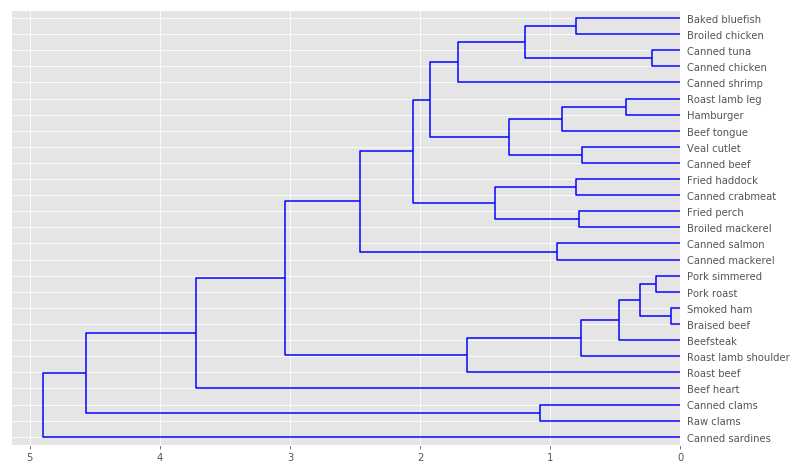

In [60]:
names = df.Name.values
dend = dendrogram(Z, color_threshold=0, labels=names, 
                  orientation='left')

In [64]:
t = 2.3
labels = fcluster(Z, t, criterion='distance')
# labels = fcluster(Z, t, criterion='maxclust')

In [66]:
df.loc[:, 'label'] = labels

In [67]:
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron,label
0,Braised beef,340,20,28,9,2.6,2
1,Hamburger,245,21,17,9,2.7,4
2,Roast beef,420,15,39,7,2.0,2
3,Beefsteak,375,19,32,9,2.6,2
4,Canned beef,180,22,10,17,3.7,4


In [68]:
for k, group in df.groupby('label'):
    print('='*10)
    print('Cluster {}'.format(k))
    print(group)

Cluster 1
            Name  Energy  Protein  Fat  Calcium  Iron  label
16     Raw clams      70       11    1       82   6.0      1
17  Canned clams      45        7    1       74   5.4      1
Cluster 2
                   Name  Energy  Protein  Fat  Calcium  Iron  label
0          Braised beef     340       20   28        9   2.6      2
2            Roast beef     420       15   39        7   2.0      2
3             Beefsteak     375       19   32        9   2.6      2
9   Roast lamb shoulder     300       18   25        9   2.3      2
10           Smoked ham     340       20   28        9   2.5      2
11           Pork roast     340       19   29        9   2.5      2
12        Pork simmered     355       19   30        9   2.4      2
Cluster 3
               Name  Energy  Protein  Fat  Calcium  Iron  label
21  Canned mackerel     155       16    9      157   1.8      3
23    Canned salmon     120       17    5      159   0.7      3
Cluster 4
                Name  Energy  Protein  Fa